In [21]:
# Importa a biblioteca de conjuntos de dados scikit-learn
from sklearn import datasets

# Carrega o conjunto de dados
iris = datasets.load_iris()

In [22]:
# Imprime os rótulos (espécies)  (setosa, versicolor,virginica)
print(iris.target_names)

# Imprime os nomes das características
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
# Imprime os dados da iris (primeiros 5 registros)
print(iris.data[0:5])

# Imprime os rótulos do conjunto de dados (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
# Cria um DataFrame com base no conjunto de dados da iris
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# Importa a função train_test_split
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Catacterísticas
y=data['species']  # Rótulos

# Separa a conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% para treinamento e 30% para teste

In [26]:
# Importa o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [27]:
# Importa o módulo metrics de scikit-learn metrics para cálculo de acurácia
from sklearn import metrics

# Modelo de acurácia; com qual frequência o classificador é correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [28]:
# Realiza a predição com base em um nova entrada
clf.predict([[3, 5, 4, 2]])

array([2])

In [29]:
# Importa o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
#n_jobs=2
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
import pandas as pd
print(iris.feature_names)
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


petal width (cm)     0.461876
petal length (cm)    0.392683
sepal length (cm)    0.120688
sepal width (cm)     0.024753
dtype: float64

No handles with labels found to put in legend.


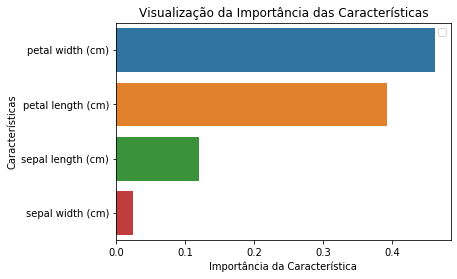

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Cria um plotagem de barra
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adiciona rótulos para o gráfico
plt.xlabel('Importância da Característica')
plt.ylabel('Características')
plt.title("Visualização da Importância das Características")
plt.legend()
plt.show()

## Gerando o Modelo com as Características Selecionadas

In [35]:
# Importa a função train_test_split
from sklearn.model_selection import train_test_split

# Obtém a partir do conjunto de dados as  características e rótulos
X=data[['petal length', 'petal width','sepal length']]  # A característica "sepal length" foi descartada
y=data['species']                                       
# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% para treinamento e 30% para test

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

# Realiza a predição utilizando o conjunto de teste
y_pred=clf.predict(X_test)

# Importa o módulo metrics de scikit-learn metrics para cálculo de acurácia
from sklearn import metrics

# Modelo de acurácia; com qual frequência o classificador é correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523
